Iteration 0: theta=0.977868, tau=0.530960
Iteration 1: theta=1.233037, tau=0.450139
Iteration 2: theta=1.321848, tau=0.408247
Iteration 3: theta=1.603792, tau=0.390808
Iteration 4: theta=1.702278, tau=0.396963
Iteration 5: theta=1.836344, tau=0.412946
Iteration 6: theta=1.822126, tau=0.398032
Iteration 7: theta=1.760122, tau=0.363667
Iteration 8: theta=1.910181, tau=0.348455
Iteration 9: theta=1.918215, tau=0.336495
Iteration 10: theta=1.876110, tau=0.353738
Iteration 11: theta=1.848098, tau=0.347813
Iteration 12: theta=1.899561, tau=0.354232
Iteration 13: theta=1.967408, tau=0.342817
Iteration 14: theta=1.983798, tau=0.337429
Iteration 15: theta=2.035042, tau=0.339331
Iteration 16: theta=2.120342, tau=0.340452
Iteration 17: theta=2.148343, tau=0.343072
Iteration 18: theta=2.191032, tau=0.319568
Iteration 19: theta=2.231852, tau=0.327572
Iteration 20: theta=2.217532, tau=0.318117
Iteration 21: theta=2.262509, tau=0.307194
Iteration 22: theta=2.337510, tau=0.306125
Iteration 23: theta=2

Iteration 192: theta=3.457545, tau=0.259699
Iteration 193: theta=3.446546, tau=0.263753
Iteration 194: theta=3.432209, tau=0.265276
Iteration 195: theta=3.436355, tau=0.265126
Iteration 196: theta=3.431637, tau=0.266217
Iteration 197: theta=3.423066, tau=0.265626
Iteration 198: theta=3.437601, tau=0.266303
Iteration 199: theta=3.438924, tau=0.269548
Iteration 200: theta=3.426545, tau=0.266323
Iteration 201: theta=3.413219, tau=0.266420
Iteration 202: theta=3.397294, tau=0.264545
Iteration 203: theta=3.403655, tau=0.268221
Iteration 204: theta=3.414288, tau=0.267369
Iteration 205: theta=3.419319, tau=0.267642
Iteration 206: theta=3.418600, tau=0.269285
Iteration 207: theta=3.425024, tau=0.266342
Iteration 208: theta=3.392041, tau=0.267076
Iteration 209: theta=3.390487, tau=0.266306
Iteration 210: theta=3.385996, tau=0.264627
Iteration 211: theta=3.393897, tau=0.263090
Iteration 212: theta=3.383982, tau=0.264411
Iteration 213: theta=3.362000, tau=0.263924
Iteration 214: theta=3.347737, t

Iteration 381: theta=3.496701, tau=0.244589
Iteration 382: theta=3.499291, tau=0.246026
Iteration 383: theta=3.497788, tau=0.245375
Iteration 384: theta=3.505180, tau=0.243851
Iteration 385: theta=3.506480, tau=0.242219
Iteration 386: theta=3.503294, tau=0.239508
Iteration 387: theta=3.516038, tau=0.236857
Iteration 388: theta=3.527562, tau=0.236497
Iteration 389: theta=3.537041, tau=0.236294
Iteration 390: theta=3.537811, tau=0.237353
Iteration 391: theta=3.537733, tau=0.237097
Iteration 392: theta=3.531418, tau=0.236889
Iteration 393: theta=3.530995, tau=0.234526
Iteration 394: theta=3.526910, tau=0.234736
Iteration 395: theta=3.536315, tau=0.234217
Iteration 396: theta=3.534960, tau=0.234298
Iteration 397: theta=3.527141, tau=0.235643
Iteration 398: theta=3.548921, tau=0.239414
Iteration 399: theta=3.537814, tau=0.238013
Iteration 400: theta=3.538219, tau=0.235964
Iteration 401: theta=3.554967, tau=0.236078
Iteration 402: theta=3.553415, tau=0.234586
Iteration 403: theta=3.544392, t

Iteration 568: theta=3.355717, tau=0.258256
Iteration 569: theta=3.350980, tau=0.258932
Iteration 570: theta=3.356107, tau=0.258829
Iteration 571: theta=3.355614, tau=0.257984
Iteration 572: theta=3.362379, tau=0.257004
Iteration 573: theta=3.374386, tau=0.258494
Iteration 574: theta=3.365022, tau=0.259744
Iteration 575: theta=3.365519, tau=0.259608
Iteration 576: theta=3.363830, tau=0.256636
Iteration 577: theta=3.352589, tau=0.257016
Iteration 578: theta=3.347581, tau=0.257965
Iteration 579: theta=3.345725, tau=0.256204
Iteration 580: theta=3.341612, tau=0.257579
Iteration 581: theta=3.343490, tau=0.257844
Iteration 582: theta=3.341807, tau=0.259464
Iteration 583: theta=3.339630, tau=0.260976
Iteration 584: theta=3.330052, tau=0.258542
Iteration 585: theta=3.333116, tau=0.259222
Iteration 586: theta=3.351917, tau=0.259443
Iteration 587: theta=3.355222, tau=0.258929
Iteration 588: theta=3.354607, tau=0.260877
Iteration 589: theta=3.351903, tau=0.260782
Iteration 590: theta=3.345151, t

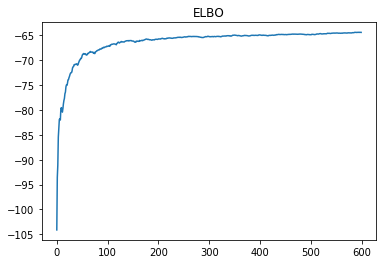

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln, psi

np.random.seed(123123120)


def compute_stochastic_elbo_gradient(alpha_tau, beta_tau, r1, r2, m2, beta2, alpha0, beta0, x, n_simulations):
	n_data_items = len(r1)
	
	# Derivatives w.r.t. alpha_tau, beta_tau, m2, beta2, and all r1 terms.
	elbo_grad_array = np.zeros((n_simulations, 4 + n_data_items))
	
	
	for simu_index in range(n_simulations):
		# Estimate the gradient by sampling (i.e. simulating) from the current
		# approximation n_simulations many times, and average in the end.
		
		
		# SAMPLE unobservables from the current approximation
		tau_s, theta_s, z_s = sample_from_q(alpha_tau, beta_tau, r1, r2, m2, beta2)
		
		# COMPUTE MODEL LOG JOINT:
		# log[p(tau)] + log[p(theta)] + log[p(z|tau)] + log[p(x|z,theta)]
		
		# log[Beta(tau|alpha0,alpha0)]
		log_p_tau = gammaln(2 * alpha0) - 2 * gammaln(alpha0) + (alpha0 - 1) * np.log(tau_s) + (alpha0 - 1) * np.log(1-tau_s)
		
		# log[N(theta|0,beta0^(-1))
		log_p_theta = 0.5 * np.log(beta0) - 0.5 * np.log(2*np.pi) - 0.5 * beta0 * theta_s ** 2
		
		# log[p(z|tau)]
		N1 = np.sum(z_s[:,0])
		N2 = np.sum(z_s[:,1])
		log_p_z_cond_tau = N1 * np.log(1-tau_s) + N2 * np.log(tau_s)
		
		# log[p(x|z,theta)]
		N = N1 + N2
		log_p_x_cond_z_theta = -0.5 * N * np.log(2*np.pi) - 0.5 * np.sum(z_s[:,0] * x ** 2) - 0.5 * np.sum(z_s[:,1] * (x - theta_s) ** 2)
		
		log_joint_p = log_p_tau + log_p_theta + log_p_z_cond_tau + log_p_x_cond_z_theta
		
		
		# COMPUTE LOG JOINT OF APPROXIMATION Q:
		# log[q(tau)] + log[q(theta)] + log[q(z)]
		
		log_q_tau = gammaln(alpha_tau + beta_tau) - gammaln(alpha_tau) - gammaln(beta_tau) + (alpha_tau - 1) * np.log(tau_s) + (beta_tau - 1) * np.log(1-tau_s)    # EXERCISE, note: the gammaln function has been imported from scipy.special
		
		log_q_theta = 0.5 * np.log(beta2) - 0.5 * np.log(2*np.pi) - 0.5 * beta2 * (theta_s - m2) ** 2   # EXERCISE
		
		log_q_z = np.sum(z_s[:,0]*np.log(r1) + z_s[:,1]*np.log(r2)) # EXERCISE
		
		log_joint_q = log_q_tau + log_q_theta + log_q_z
		
		
		# COMPUTE GRADIENT of loq[q(tau,theta,z)] w.r.t. variational parameters
		
		d_alpha_tau = psi(alpha_tau + beta_tau) - psi(alpha_tau) + np.log(tau_s)   # EXERCISE, note: the psi function has been imported from scipy.special
		
		d_beta_tau = psi(alpha_tau + beta_tau) - psi(beta_tau) + np.log(1-tau_s)    # EXERCISE
		
		d_m2 = beta2 * (theta_s - m2)          # EXERCISE
		
		d_beta2 = 0.5/beta2 -0.5*(theta_s - m2)**2       # EXERCISE
		
		d_rn1 =  z_s[:,0]/r1 - z_s[:,1]/(1-r1)       # EXERCISE
		
		# COMBINE EVERYTHING to form the gradient of the ELBO:
		elbo_grad_array[simu_index, :] = np.concatenate([[d_alpha_tau, d_beta_tau, d_m2, d_beta2], d_rn1]) * (log_joint_p - log_joint_q)
	
	
	# AVERAGE over the samples:
	elbo_grad = np.mean(elbo_grad_array, axis=0)
	
	return elbo_grad


def sample_from_q(alpha_tau, beta_tau, r1, r2, m2, beta2):
	tau_s = np.random.beta(alpha_tau,beta_tau)    # EXERCISE
	theta_s = np.random.normal(m2,1/beta2)  # EXERCISE
	z1 = np.random.binomial(1,r1,len(r1))  > r1 # EXERCISE
	z2 = 1 - z1  # EXERCISE
	
	# z_s contains z1 and z2 as its columns
	z_s = np.array([z1, z2]).T
	
	return tau_s, theta_s, z_s


# Compute ELBO for the model described in simple_elbo.pdf
def compute_elbo(alpha_tau, beta_tau, r1, r2, m2, beta2, alpha0, beta0, x):
    
    # E[log p(tau)]
    term1 = (alpha0 - 1) * (psi(alpha_tau) + psi(beta_tau) - 2 * psi(alpha_tau + beta_tau))

    # E[log p(theta)]
    term2 = -0.5 * beta0 * (beta2**(-1) + m2**2)

    # E[log p(z|tau)]
    N2 = np.sum(r2); N1 = np.sum(r1); N = N1 + N2
    term3 = N2 * psi(alpha_tau) + N1 * psi(beta_tau) - N * psi(alpha_tau + beta_tau)

    # E[log p(x|z,theta)]
    term4 = -0.5 * np.sum(r1 * x**2) - 0.5 * np.sum(r2 * ((x-m2)**2 + beta2**(-1)))

    # Negative entropy of q(z)
    term5 = np.sum(r1 * np.log(r1)) + np.sum(r2 * np.log(r2))

    # Negative entropy of q(tau)
    term6 = (gammaln(alpha_tau + beta_tau) - gammaln(alpha_tau) - gammaln(beta_tau)
        + (alpha_tau - 1) * psi(alpha_tau) + (beta_tau - 1) * psi(beta_tau)
        - (alpha_tau + beta_tau - 2) * psi(alpha_tau + beta_tau))

    # Negative entropy of q(theta)
    term7 = 0.5 * np.log(beta2)

    elbo = term1 + term2 + term3 + term4 - term5 - term6 - term7
    
    return elbo

# Simulate data
theta_true = 4
tau_true = 0.3
n_samples = 50
z = (np.random.rand(n_samples) < tau_true)  # True with probability tau_true
x = np.random.randn(n_samples) + z * theta_true


# Parameters of the prior distributions.
alpha0 = 1.5
beta0 = 1

n_iter = 600
# To keep track of the estimates of tau and theta in different iterations:
tau_est = np.zeros(n_iter)
th_est = np.zeros(n_iter)
elbo_array = np.zeros(n_iter)   # To track the elbo


# Some initial values for the variational parameters
alpha_tau = 1
beta_tau = 1
beta_2 = 1
m2 = 1
r1 = np.random.rand(n_samples)   # Responsibilities of the first cluster.
r2 = 1 - r1

for it in range(n_iter):
	step_size = 0.02 / (10+it)**0.5
	
	# Compute the gradient of the ELBO
	elbo_grad = compute_stochastic_elbo_gradient(alpha_tau, beta_tau, r1, r2, m2, beta_2, alpha0, beta0, x, 200)
	
	# Update factor q(tau) using stochastic gradient
	alpha_tau = np.max([alpha_tau + step_size * elbo_grad[0], 0.1])
	beta_tau  = np.max([beta_tau  + step_size * elbo_grad[1], 0.1])
	
	# Update factor q(theta) using stochastic gradient
	m2 = m2 + step_size * elbo_grad[2]
	beta_2 = beta_2 + step_size * elbo_grad[3]
	
	# Update responsibilites, factor q(z), using closed-form updates
	E_log_tau = psi(alpha_tau) - psi(alpha_tau + beta_tau)
	E_log_tau_c = psi(beta_tau) - psi(alpha_tau + beta_tau)
	E_log_var = (x-m2)**2 + 1/beta_2
	
	log_rho1 = E_log_tau_c - 0.5 * np.log(2*np.pi) - 0.5 * (x**2)
	log_rho2 = E_log_tau - 0.5 * np.log(2*np.pi) - 0.5 * E_log_var
	max_log_rho = np.maximum(log_rho1, log_rho2)   # Normalize to avoid numerical problems when exponentiating.
	rho1 = np.exp(log_rho1 - max_log_rho)
	rho2 = np.exp(log_rho2 - max_log_rho)
	r2 = rho2 / (rho1 + rho2)
	r1 = 1 - r2
	
	# Keep track of the current estimates
	tau_est[it] = (alpha_tau) / (alpha_tau + beta_tau)
	th_est[it] = m2
	
	# Compute the ELBO
	elbo_array[it] = compute_elbo(alpha_tau, beta_tau, r1, r2, m2, beta_2, alpha0, beta0, x)
	
	print("Iteration %i: theta=%f, tau=%f" % (it, m2, tau_est[it]))
	# With large enough n_samples, this should eventually converge 
	# to (theta_true, tau_true), at least approximately.


plt.plot(elbo_array)
plt.title('ELBO')
plt.show()


In [15]:
np.random.binomial(1,r1,len(r1))

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1])

In [2]:
#!pip install edward==1.3.5
!pip install tensorflow==1.4.1

    100% |████████████████████████████████| 41.2MB 845kB/s eta 0:00:01    43% |██████████████                  | 18.1MB 43.0MB/s eta 0:00:01
    100% |████████████████████████████████| 1.7MB 17.7MB/s ta 0:00:01
gpflow 1.3.0 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.4.1 which is incompatible.
  Found existing installation: tensorflow-tensorboard 1.5.1
    Uninstalling tensorflow-tensorboard-1.5.1:
      Successfully uninstalled tensorflow-tensorboard-1.5.1
  Found existing installation: tensorflow 1.10.0
    Uninstalling tensorflow-1.10.0:
      Successfully uninstalled tensorflow-1.10.0
